In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## IMPORTING DATA

In [75]:
data = pd.read_csv("salary_prediction.csv")
data.head(3)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0


In [76]:
data.shape

(2639, 13)

## DATA PREPROCESSING

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


In [78]:
data = data.drop(["FIRST NAME","LAST NAME","DOJ","CURRENT DATE"],axis=1)

In [79]:
data.isnull().sum()

SEX                 0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEX               2639 non-null   object 
 1   DESIGNATION       2639 non-null   object 
 2   AGE               2636 non-null   float64
 3   SALARY            2639 non-null   int64  
 4   UNIT              2639 non-null   object 
 5   LEAVES USED       2636 non-null   float64
 6   LEAVES REMAINING  2637 non-null   float64
 7   RATINGS           2637 non-null   float64
 8   PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 185.7+ KB


In [81]:
data.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,F,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,M,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [82]:
data_new= data.dropna(axis=0)
data_new.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
5,F,Analyst,22.0,48736,Marketing,20.0,10.0,4.0,0
6,M,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0


## Exploratory Data Analysis (EDA):

In [83]:
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,2632.0,24.753799,3.904332,21.0,22.0,24.0,25.00,45.0
SALARY,2632.0,58114.079787,36861.179041,40001.0,43418.0,46783.0,51390.75,388112.0
LEAVES USED,2632.0,22.497720,4.602397,15.0,19.0,22.0,26.00,30.0
LEAVES REMAINING,2632.0,7.502280,4.602397,0.0,4.0,8.0,11.00,15.0
RATINGS,2632.0,3.486702,1.114081,2.0,2.0,3.0,4.00,5.0
PAST EXP,2632.0,1.562310,2.725625,0.0,0.0,1.0,2.00,23.0


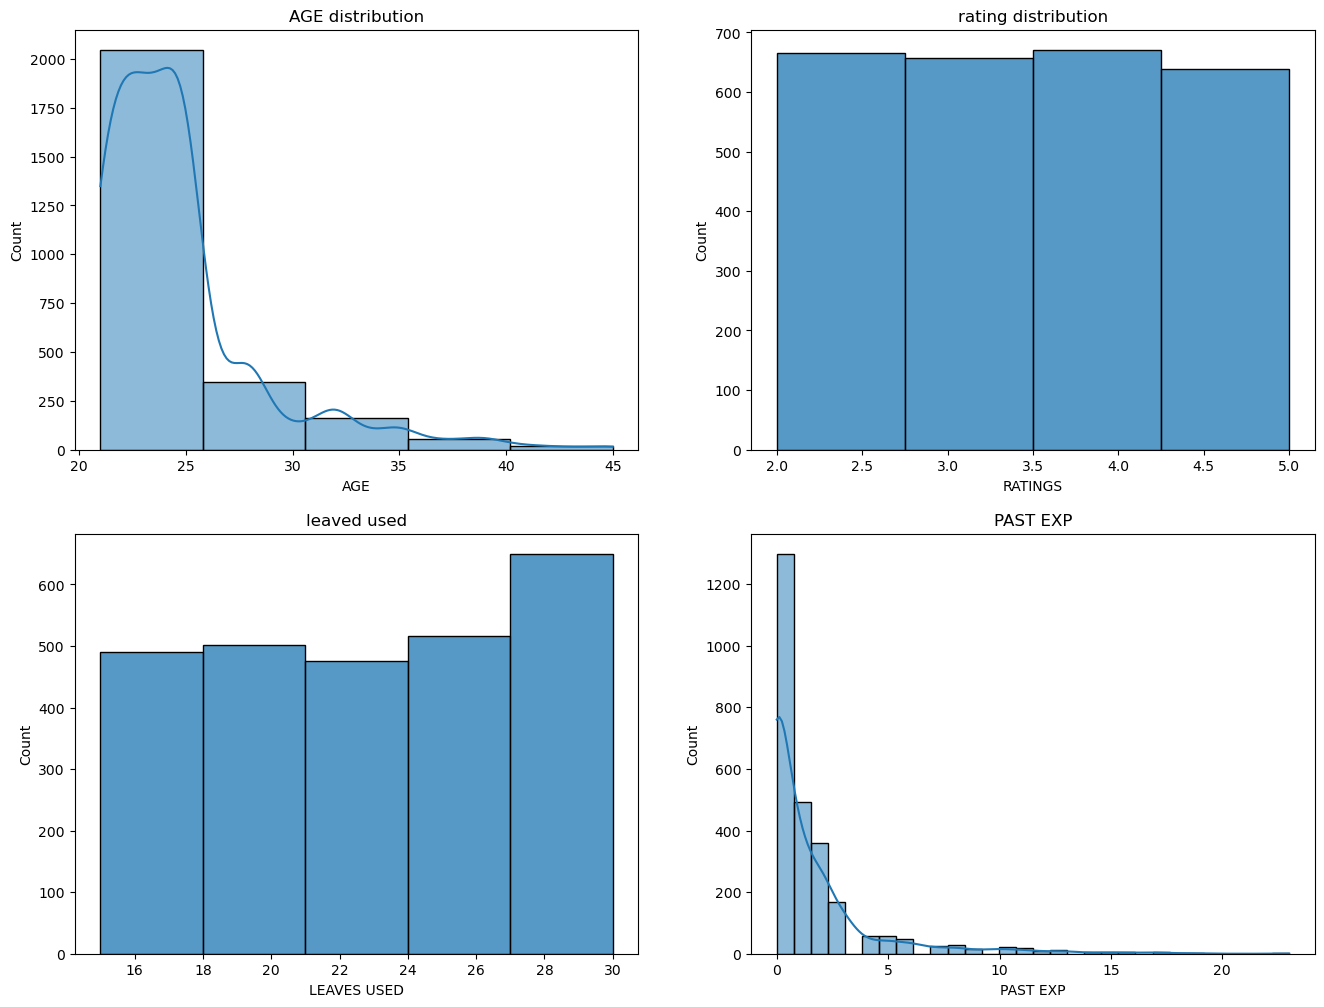

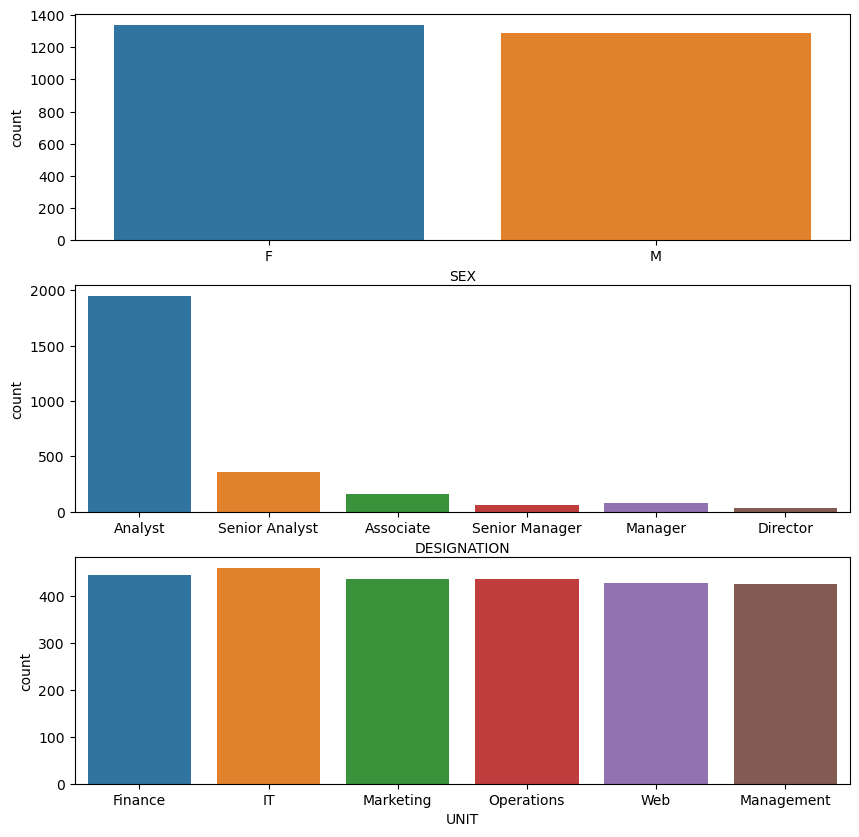

<Figure size 640x480 with 0 Axes>

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(2,2,figsize=(16,12))

sns.histplot(data_new["AGE"],bins=5,kde=True,ax=ax[0,0])
ax[0,0].set_title("AGE distribution")

sns.histplot(data_new["RATINGS"],bins=4,ax=ax[0,1])
ax[0,1].set_title("rating distribution")

sns.histplot(data_new["LEAVES USED"],bins=5,ax=ax[1,0])
ax[1,0].set_title("leaved used")

sns.histplot(data_new["PAST EXP"],bins=30,kde=True,ax=ax[1,1])
ax[1,1].set_title("PAST EXP")

fg,ax = plt.subplots(3,1,figsize=(10,10))

sns.countplot(x="SEX",data=data_new,ax=ax[0])
sns.countplot(x="DESIGNATION",data=data_new,ax=ax[1])
sns.countplot(x="UNIT",data=data_new,ax=ax[2])
plt.show()

plt.tight_layout()

<Axes: >

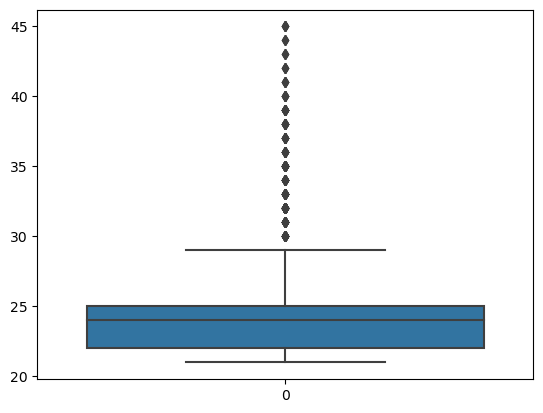

In [85]:
sns.boxplot(data_new["AGE"])

## ENCODING OF CATEGORICAL COLUMNS (OHE)

In [86]:
data_enc = pd.get_dummies(data_new,columns=['SEX','DESIGNATION','UNIT'],dtype=int,drop_first=True)

In [87]:
data_enc

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,SEX_M,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,21.0,44570,24.0,6.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0
2,21.0,40955,23.0,7.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0
3,22.0,45550,22.0,8.0,3.0,0,0,0,0,0,0,0,1,0,0,0,0
5,22.0,48736,20.0,10.0,4.0,0,0,0,0,0,0,0,0,0,1,0,0
6,22.0,40339,19.0,11.0,5.0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,36.0,185977,15.0,15.0,5.0,10,0,0,0,0,0,1,0,1,0,0,0
2635,23.0,45758,17.0,13.0,2.0,0,0,0,0,0,0,0,1,0,0,0,0
2636,21.0,47315,29.0,1.0,5.0,0,0,0,0,0,0,0,0,0,0,0,1
2637,24.0,45172,23.0,7.0,3.0,1,0,0,0,0,0,0,0,0,0,0,1


## FEATURE ENGINEERING

In [88]:
data_enc.rename(columns={
    'LEAVES REMAINING': 'LEAVES_REMAINING',
    'LEAVES USED': 'LEAVES_USED',
    'PAST EXP': 'PAST_EXP',
    'DESIGNATION_Senior Analyst': 'DESIGNATION_Senior_Analyst',
    'DESIGNATION_Senior Manager': 'DESIGNATION_Senior_Manager'
}, inplace=True)

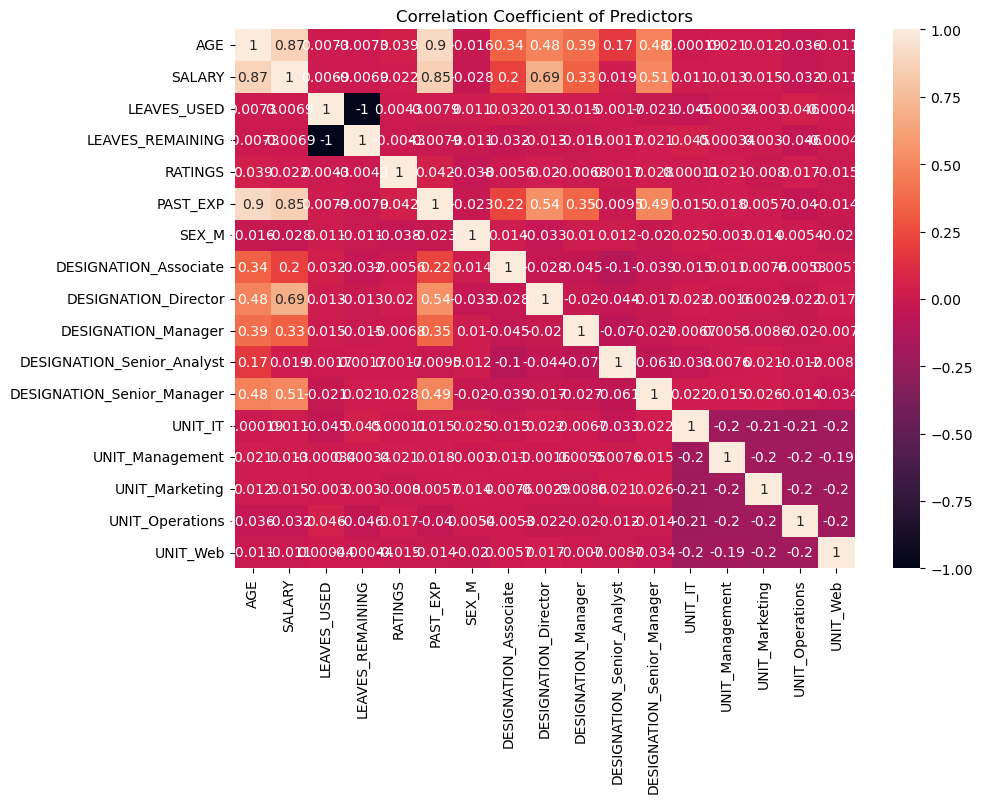

In [89]:
plt.figure(figsize=(10,7))

sns.heatmap(data_enc.corr(),annot=True,vmin=-1,vmax=1)
plt.title("Correlation Coefficient of Predictors")
plt.show()

In [90]:
def calculate_vif(df):
    VIF_data = pd.DataFrame()
    VIF_data["feature"] = df.columns
    VIF_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return VIF_data

vif_data = calculate_vif(data_enc.drop(["SALARY","AGE","LEAVES_USED"], axis=1))  # Exclude target variable for VIF calculation
vif_data

,feature,VIF
0,LEAVES_REMAINING,3.168908
1,RATINGS,5.578695
2,PAST_EXP,5.972956
3,SEX_M,1.860190
4,DESIGNATION_Associate,1.476721
5,DESIGNATION_Director,2.522653
6,DESIGNATION_Manager,1.789090
7,DESIGNATION_Senior_Analyst,1.233960
8,DESIGNATION_Senior_Manager,2.342646
9,UNIT_IT,1.766055


In [91]:
reg_all = smf.ols(formula = 'SALARY ~ AGE +LEAVES_REMAINING+ LEAVES_USED+ PAST_EXP + RATINGS + DESIGNATION_Associate + DESIGNATION_Director +DESIGNATION_Senior_Analyst' ,data=data_enc).fit()
reg_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     2414.
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:29:02   Log-Likelihood:                -28769.
No. Observations:                2632   AIC:                         5.755e+04
Df Residuals:                    2624   BIC:                         5.760e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -225.1137      9.714    -23.174      0.000    -244.162    -206.065
AGE                         6474.9802    190.951     33.909      0.000    6100.550    6849.410
LEAVES_REMAINING           -3371.6778    151.597    -22.241      0.000   -3668.940   -3074.416
LEAVES_USED                -3381.7323    145.358    -23.265      0.000   -3666.760   -3096.704
PAST_EXP                     998.8996    262.034      3.812      0.000     485.086    1512.713
RATINGS                     -483.5794    237.077     -2.040      0.041    -948.456     -18.703
DESIGNATION_Associate      -7504.8887   1282.905     -5.850      0.000      -1e+04   -4989.281
DESIGNATION_Director        1.055e+05   2932.400     35.982      0.000    9.98e+04    1.11e+05
DESIGNATION_Senior_Analyst -9400.1927    886.337    -10.606      0.000   -1.11e+04   -7662.203
==============================================================================
Omnibus:                      609.116   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5446.605
Skew:                           0.836   Prob(JB):                         0.00
Kurtosis:                       9.846   Cond. No.                     1.43e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.55e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## LINEAR REGRESSION MODEL

In [92]:
x= data_enc.drop(['SALARY','DESIGNATION_Manager','DESIGNATION_Senior_Manager','UNIT_IT','UNIT_Management','UNIT_Marketing','UNIT_Operations','UNIT_Web'],axis=1).values
y= data_enc['SALARY'].values

In [93]:
scaler =StandardScaler()

xs = scaler.fit_transform(x)

xs

array([[-0.96162739,  0.32647449, -0.32647449, ..., -0.25271365,
        -0.11094004, -0.39549306],
       [-0.96162739,  0.1091551 , -0.1091551 , ..., -0.25271365,
        -0.11094004, -0.39549306],
       [-0.70545297, -0.10816429,  0.10816429, ..., -0.25271365,
        -0.11094004, -0.39549306],
       ...,
       [-0.96162739,  1.41307143, -1.41307143, ..., -0.25271365,
        -0.11094004, -0.39549306],
       [-0.19310412,  0.1091551 , -0.1091551 , ..., -0.25271365,
        -0.11094004, -0.39549306],
       [-0.19310412, -1.19476123,  1.19476123, ..., -0.25271365,
        -0.11094004, -0.39549306]])

In [95]:
x_train,x_test,y_train,y_test = train_test_split(xs,y,test_size=0.3,random_state=42)

In [97]:
model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [98]:
y_pred = model.predict(x_test)

In [99]:
#calculate residuals = actual - predicted
#square the residuals
#sum the squared values/n:MSE

mse = mean_squared_error(y_test,y_pred)
rmse = sqrt(mse)
rmse

14620.524314610891

In [100]:
model.score(x_test,y_test)

0.8758146693523605

<Axes: ylabel='Density'>

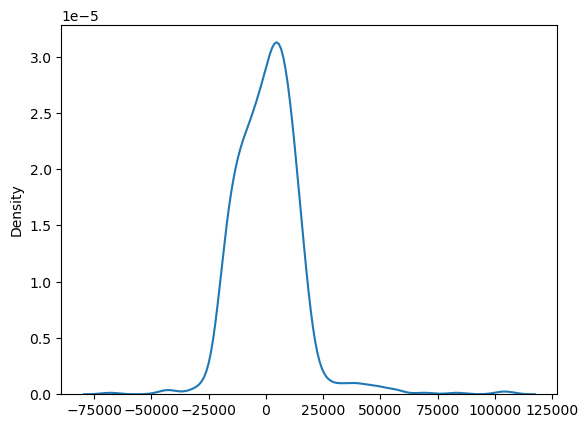

In [101]:
residuals = y_test - y_pred
sns.kdeplot(residuals)

In [102]:
y_predtrain = model.predict(x_train)

In [103]:
#calculate residuals = actual - predicted
#square the residuals
#sum the squared values/n:MSE

mse = mean_squared_error(y_train,y_predtrain)
rmse = sqrt(mse)
rmse

13081.709336956159

In [104]:
model.score(x_train,y_train)

0.857464552074765

## CROSS VALIDATION

In [35]:
model = LinearRegression()

cv_scores = cross_val_score(model,x_test,y_test,cv=5,scoring='r2')
average_r2 = np.mean(cv_scores)

print("Cross-validated R² scores:", cv_scores)
print("Average R² score:", average_r2)

Cross-validated R² scores: [0.91466764 0.87588745 0.89496206 0.87637258 0.80952355]
Average R² score: 0.8742826554290343


In [36]:
model = LinearRegression()

cv_scores = cross_val_score(model,x_train,y_train,cv=5,scoring='r2')
average_r2 = np.mean(cv_scores)

print("Cross-validated R² scores:", cv_scores)
print("Average R² score:", average_r2)

Cross-validated R² scores: [0.80686403 0.86672037 0.85024474 0.86340063 0.85862641]
Average R² score: 0.8491712387908675


## DECISIONS TREES MODEL

In [38]:
x= data_enc.drop(['SALARY','DESIGNATION_Manager','DESIGNATION_Senior_Manager','UNIT_IT','UNIT_Management','UNIT_Marketing','UNIT_Operations','UNIT_Web'],axis=1)
y= data_enc['SALARY']

In [39]:
x_train,x_test,y_train,y_test = train_test_split(xs,y,test_size=0.3,random_state=42)

In [40]:
dt_regressor = DecisionTreeRegressor(random_state=42)

In [41]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[1,2,5,10]
}

In [43]:
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [44]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [45]:
grid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [46]:
param_grid1 = {
    'criterion': ['squared_error'],
    'max_depth': range(1,10),
    'min_samples_split': [2],
    'min_samples_leaf':range(5,10)
}

In [47]:
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid1, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(5, 10),
                         'min_samples_split': [2]},
             scoring='neg_mean_squared_error')

In [48]:
 best_model = grid_search.best_estimator_

In [49]:
y_pred = best_model.predict(x_test)

In [50]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(mae,mse,rmse,r2)

4613.442482690078 89559368.51832318 9463.581167735774 0.9479698083084694


In [51]:
y_pred_train = best_model.predict(x_train)

In [52]:
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)

print(mae,mse,rmse,r2)

4189.636947061741 58845987.52431623 7671.113838571047 0.9509870605022736


## RANDOM FOREST

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [55]:
# create an object of the RandomForestRegressor

model_RFR = RandomForestRegressor()

model_RFR.fit(x_train,y_train)

predict_train = model_RFR.predict(x_train)
predict_test = model_RFR.predict(x_test)

print(mean_squared_error(y_train,predict_train)**(0.5))
print(mean_squared_error(y_test,predict_test)**(0.5))

3879.4055157320417
8423.647730841572


In [56]:
model_RFR = RandomForestRegressor(random_state=42)

params = {'max_depth':[2,5,10],
         "min_samples_leaf":[5,10,15],
         "n_estimators":[100,200],
         "min_samples_split":[2,5,10],
          'bootstrap': [True, False]
         }

In [57]:
grid_search = GridSearchCV(model_RFR, params, cv=4)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 5, 10],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]})

In [58]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

In [59]:
params2 = {'max_depth':range(1,10),
         "min_samples_leaf":range(5,15),
         "n_estimators":[100],
         "min_samples_split":[2],
        "bootstrap": [False]
         }

In [60]:
grid_search2 = GridSearchCV(model_RFR, params2, cv=4)

grid_search2.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [False], 'max_depth': range(1, 10),
                         'min_samples_leaf': range(5, 15),
                         'min_samples_split': [2], 'n_estimators': [100]})

In [61]:
best_model = grid_search2.best_estimator_

In [62]:
best_model

RandomForestRegressor(bootstrap=False, max_depth=4, min_samples_leaf=10,
                      random_state=42)

In [63]:
# predict the target on train and test data
predict_train = best_model.predict(x_train)
predict_test = best_model.predict(x_test)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**(0.5))

RMSE on train data:  7723.814325762778
RMSE on test data:  9293.477863740729


In [64]:
results = best_model.feature_importances_

In [65]:
plt.figure(figsize=(10,7))

feat_importances = pd.Series(results, index = x_train.columns)

feat_importances

AGE                           0.826894
LEAVES_USED                   0.000040
LEAVES_REMAINING              0.000040
RATINGS                       0.000057
PAST_EXP                      0.000340
SEX_M                         0.000000
DESIGNATION_Associate         0.008786
DESIGNATION_Director          0.125007
DESIGNATION_Senior_Analyst    0.038836
dtype: float64

<Figure size 1000x700 with 0 Axes>

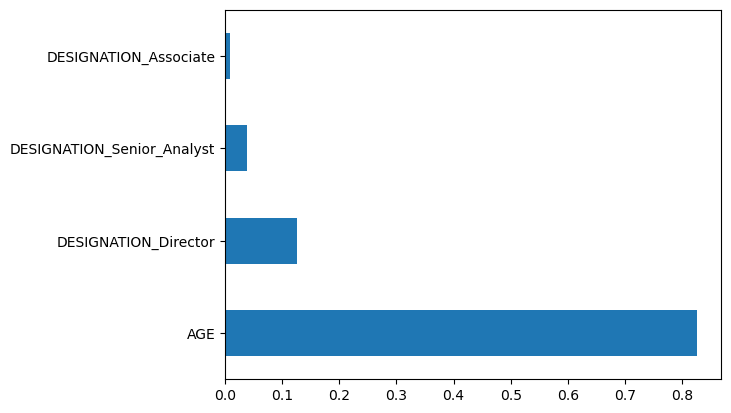

In [66]:
feat_importances.nlargest(4).plot(kind='barh');

In [67]:
# training data with 4 most important features
train_x_if = x_train[["AGE","DESIGNATION_Senior_Analyst",'DESIGNATION_Director','DESIGNATION_Associate']]
# test data with 7 most important features
test_x_if = x_test[["AGE","DESIGNATION_Senior_Analyst",'DESIGNATION_Director','DESIGNATION_Associate']]

# create an object of the RandfomForestRegressor Model
model_RFR_with_if = RandomForestRegressor(max_depth=6, min_samples_leaf=7, n_estimators=16,min_samples_split=2,
                      random_state=42)

# fit the model with the training data
model_RFR_with_if.fit(train_x_if, y_train)

# predict the target on the training and test data
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)

# Root Mean Squared Error on the train and test data
print('RMSE on train data: ', mean_squared_error(y_train, predict_train_with_if)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test_with_if)**(0.5))

RMSE on train data:  7794.223880182236
RMSE on test data:  9462.291981728788


## GRADIENT BOOSTING

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import numpy as np

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
gbr = GradientBoostingRegressor(random_state=42)

In [71]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [72]:
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [73]:
grid_search.fit(x_train, y_train)

KeyboardInterrupt: 

In [71]:
grid_search.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_split=10,
                          n_estimators=200, random_state=42)

In [72]:
param_grid2 = {
    'n_estimators': [200,250,300],
    'learning_rate': [0.05],
    'max_depth': [5],
    'min_samples_split': [10,12,15],
    'min_samples_leaf': [1],
    'subsample': [1.0]
}

In [73]:
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid2, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [74]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05], 'max_depth': [5],
                         'min_samples_leaf': [1],
                         'min_samples_split': [10, 12, 15],
                         'n_estimators': [200, 250, 300], 'subsample': [1.0]},
             scoring='neg_mean_squared_error')

In [100]:
best_gbr= grid_search.best_params_
best_gbr

{'learning_rate': 0.05,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200,
 'subsample': 1.0}

In [76]:
y_pred = best_gbr.predict(x_test)

In [77]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [78]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 4298.991692382985
Mean Squared Error: 55329699.99571248
Root Mean Squared Error: 7438.393643503447
R-squared: 0.9664746842429919


In [79]:
y_pred_train = best_gbr.predict(x_train)

In [80]:
mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)

In [81]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 3138.5624460368463
Mean Squared Error: 16370233.889779544
Root Mean Squared Error: 4046.014568656364
R-squared: 0.9872575548591157


## Pipeline Design

 We will define our pipeline in three stages:

Create the required binary features

Perform required data preprocessing and transformations

Build a model to predict the sales

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import numpy as np

In [88]:
data = pd.read_csv("salary_prediction.csv")
data=data.dropna(axis=0)
# Define feature columns and target column
feature_columns = ['AGE','PAST EXP', 'DESIGNATION', 'LEAVES USED','LEAVES REMAINING', 'RATINGS']
target_column = 'SALARY'

X = data[feature_columns]
y = data[target_column]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
base_models = [
   ("random_forest", RandomForestRegressor(bootstrap=False, max_depth=4, min_samples_leaf=10,n_estimators=100,min_samples_split=2,random_state=42)),
    ("Decision_Tree", DecisionTreeRegressor(max_depth=4 ,min_samples_leaf=9,min_samples_split=2 ,criterion='squared_error',random_state=42)),
    ("Gradient_Boosting", GradientBoostingRegressor(max_depth=5,learning_rate=0.05,subsample= 1.0,min_samples_leaf = 1, n_estimators=200,min_samples_split=10,random_state=42))
]

In [90]:
meta_model = LinearRegression()

In [91]:
# Define the preprocessing for numeric features
numeric_features = ['AGE','PAST EXP','LEAVES USED','LEAVES REMAINING','RATINGS']
numeric_transformer = StandardScaler()

# Define the preprocessing for categorical features
categorical_features = ['DESIGNATION']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model,cv=5)

# Define the pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking', stacking_regressor)
])

In [92]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGE', 'PAST EXP',
                                                   'LEAVES USED',
                                                   'LEAVES REMAINING',
                                                   'RATINGS']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['DESIGNATION'])])),
                ('stacking',
                 StackingRegressor(cv=5,
                                   estimators=[('random_forest',
                                                RandomForestRegressor(bootstrap=False,
                                                                      max_depth=4,
                                                                      min_samples_leaf=10,
                                                                      random_state=42)),
                                               ('Decision_Tree',
                                                DecisionTreeRegressor(max_depth=4,
                                                                      min_samples_leaf=9,
                                                                      random_state=42)),
                                               ('Gradient_Boosting',
                                                GradientBoostingRegressor(learning_rate=0.05,
                                                                          max_depth=5,
                                                                          min_samples_split=10,
                                                                          n_estimators=200,
                                                                          random_state=42))],
                                   final_estimator=LinearRegression()))])

In [93]:
y_pred = pipeline.predict(X_test)

In [94]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 4407.046565274471
Mean Squared Error: 78045517.540375
Root Mean Squared Error: 8834.337413772184
R-squared: 0.9431107157693666


In [95]:
y_pred_train= pipeline.predict(X_train)

In [96]:
mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 3444.259766837185
Mean Squared Error: 27881345.034945555
Root Mean Squared Error: 5280.278878520106
R-squared: 0.9793931441173688
